# Comparing OLS and KNN models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import neighbors
import scipy

In [2]:
## load our dataset from previous notebook
%store -r model_features

## OLS Regression
This is our OLS regression from the previous project.

In [3]:
Y = np.log1p(model_features['saleprice'])
X = model_features[['overallqual','totalsf','location']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\python34\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1890.
Date:                Fri, 27 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:42:00   Log-Likelihood:                 427.95
No. Observations:                1460   AIC:                            -847.9
Df Residuals:                    1456   BIC:                            -826.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.7049      0.024    452.269      0.000      10.658      10.751
overallqual     0.1170      0.005     22.201      0.000       0.107       0.127
totalsf         0.0002   7.74e-06     25.961      0.000       0.000       0.000
location        0.1781      0.012     14.925      0.000       0.155       0.202
==============================================================================
Omnibus:                      889.936   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26790.817
Skew:                          -2.314   Prob(JB):                         0.00
Kurtosis:                      23.469   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## KNN Model

Text(0.5, 1.0, 'K=10, Unweighted')

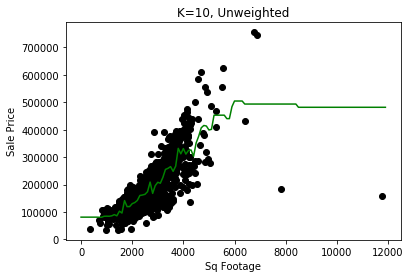

In [24]:
## build the model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
Y = np.array(model_features['saleprice'])
X = np.array(model_features['totalsf'])
Y = Y.reshape(-1,1)
X = X.reshape(-1,1)
knn.fit(X,Y)

# Set up our prediction line.
T = np.arange(0, 12000, 100)[:, np.newaxis]

# prediction
Y_ = knn.predict(T)

##plot
plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.ylabel('Sale Price')
plt.xlabel('Sq Footage')
plt.title('K=10, Unweighted')

This model is obviously overfitting the data, let's try to improve it by using weights.

Text(0.5, 1.0, 'K=10, Unweighted')

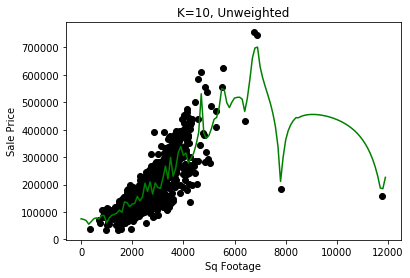

In [19]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 12000, 100)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.ylabel('Sale Price')
plt.xlabel('Sq Footage')
plt.title('K=10, Unweighted')

Text(0.5, 1.0, 'K=100, Unweighted')

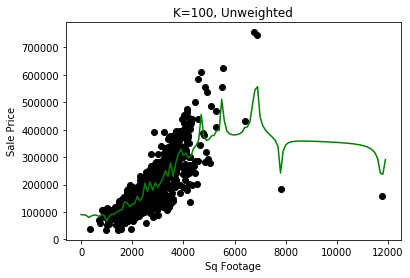

In [20]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=100, weights='distance')
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 12000, 100)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.ylabel('Sale Price')
plt.xlabel('Sq Footage')
plt.title('K=100, Unweighted')

Text(0.5, 1.0, 'K=1000, Unweighted')

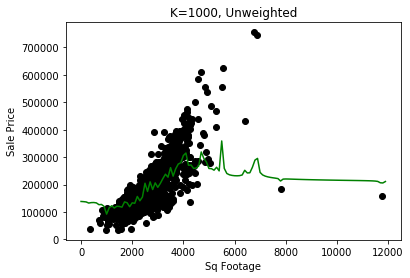

In [21]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=1000, weights='distance')
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 12000, 100)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.ylabel('Sale Price')
plt.xlabel('Sq Footage')
plt.title('K=1000, Unweighted')

KNN is definitely better for classification, as the outliers highly skew the model.